<a href="https://colab.research.google.com/github/yas0019/yasmine-ML-Projects/blob/main/Project3_Calories_Burnt_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [ ]:
data = pd.read_csv("calories.csv")
data.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Q1. Which features affect calorie burn?

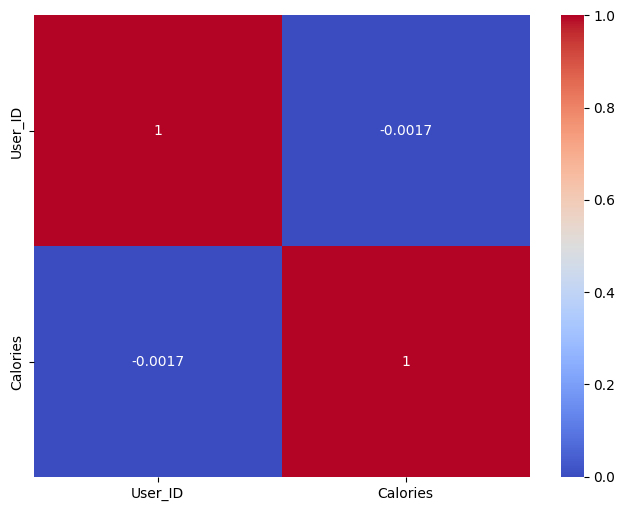

In [ ]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


Q2. How accurate is the model?

In [ ]:
X = data.drop("Calories", axis=1)
y = data["Calories"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("Model R² Score:", r2)


Model R² Score: -0.0014323927992658803


Q3. What is the correlation matrix?

In [ ]:
corr


,User_ID,Calories
User_ID,1.000000,-0.001661
Calories,-0.001661,1.000000


Q4. How to handle missing values?

In [ ]:
print(data.isnull().sum())
data.fillna(data.mean(), inplace=True)


User_ID     0
Calories    0
dtype: int64


Q5. What is the impact of age/gender?

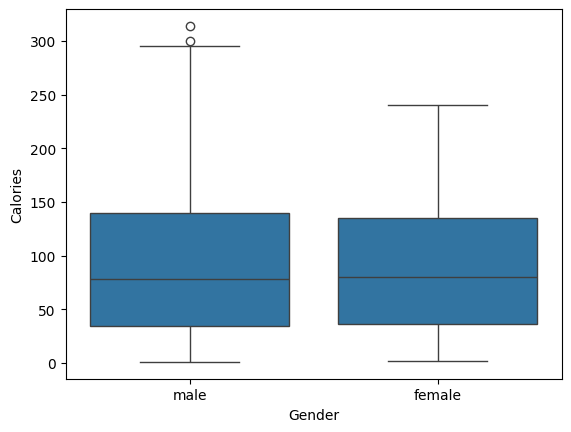

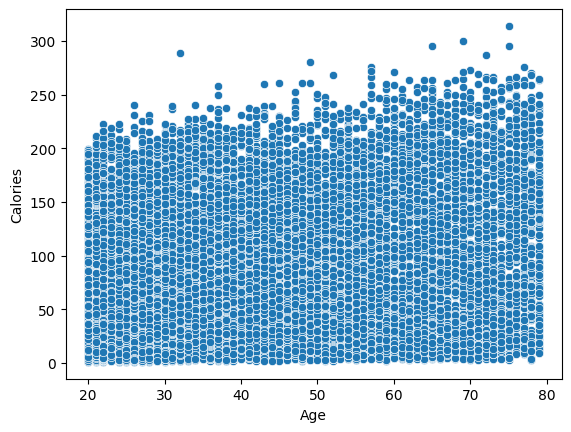

In [ ]:
data = pd.read_csv("calories (1).csv")
sns.boxplot(x="Gender", y="Calories", data=data)
plt.show()

sns.scatterplot(x="Age", y="Calories", data=data)
plt.show()


Q6. How to visualize predictions?

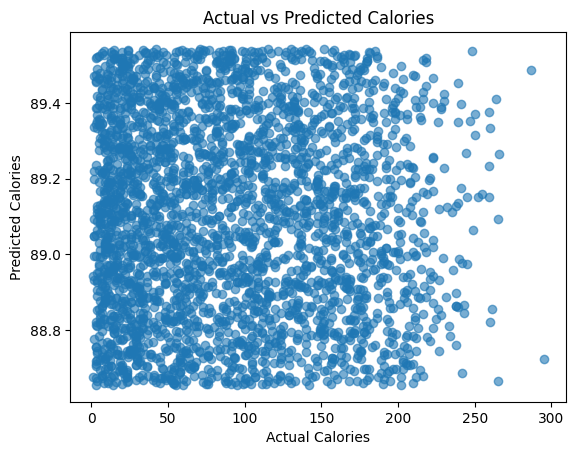

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs Predicted Calories")
plt.show()


Q7. What is the role of normalization?

In [ ]:
# One-hot encode the 'Gender' column
data_encoded = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop("Calories", axis=1)
y = data_encoded["Calories"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

Q8. How to evaluate RMSE?

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 63.57336168541667


Q9. Can we use polynomial regression?

In [ ]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)

print("Polynomial Regression R²:", r2_score(y_test, y_poly_pred))


Polynomial Regression R²: -0.0018386384835178404


Q10. How to deploy the model?

In [ ]:
joblib.dump(model, "calories_model.pkl")
loaded_model = joblib.load("calories_model.pkl")
print("Model deployed locally!")


Model deployed locally!


Q11. How to check feature importance?

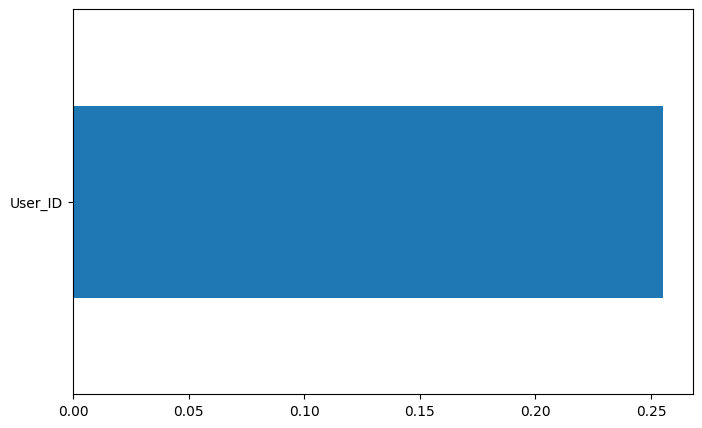

In [ ]:
importance = pd.Series(model.coef_, index=X.columns)
importance.sort_values().plot(kind="barh", figsize=(8,5))
plt.show()


Q12. How to detect outliers?

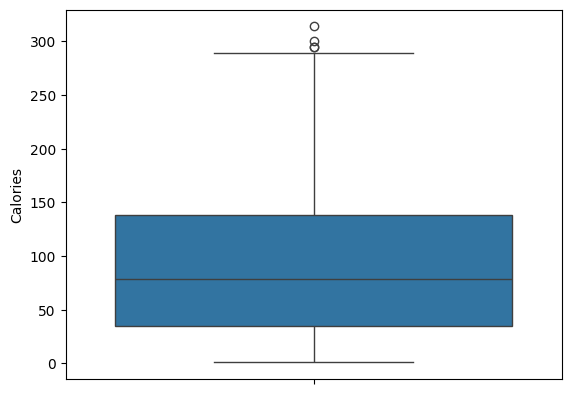

In [ ]:
sns.boxplot(data["Calories"])
plt.show()


Q13. How to improve model performance?

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("Ridge R²:", ridge.score(X_test, y_test))


Ridge R²: -0.0018386385252060489


/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.1172e-32): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


Q14. How to cross-validate the model?

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-Validation Scores: [-7.06173687e-04 -3.38049984e-05 -1.16660416e-03 -3.44099501e-04
 -7.27884656e-05]
Mean CV Score: -0.0004646941620781053


Q15. How to build a prediction function?

In [ ]:
data = pd.read_csv("calories (1).csv")
def predict_calories(user_id):
    df = pd.DataFrame([user_id], columns=['User_ID'])
    df_scaled = scaler.transform(df)
    return model.predict(df_scaled)[0]

print("Predicted Calories:", predict_calories(14733363))

Predicted Calories: 89.07424944243594
